Example of the 4 largest eigen faces in the dataset

took 10.629775285720825 seconds to read data
base took 0.19199895858764648 seconds to build


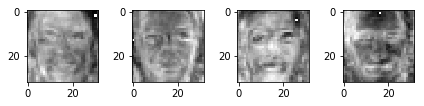

In [5]:
from eigenfaces import *
from time import time

time_stamp_pre = time()

(train_data, random_train, test_data) = get_training_test_and_real_test_data()

print("took {} seconds to read data"
       .format(time() - time_stamp_pre))

classifier = Eigenclassifier(base_dim=5)

# Try adding orthogonalization and see how the faces change! :) 
# classifier = Eigenclassifier(base_dim=5, orthogonalize=True)

classifier.build_base(train_data)
classifier.define_face_space(train_data)
classifier.show_principal_component()

Examples of Classification.

The test dataset given does not provide labels, i thus assume that all images are faces, as they appear to be.

Thus any image not classified as a face will be considered wrongly classified and the first failed image will be
displayed together with the feature it failed on!

Try changing the dimension of the eigenbase and wether or not it should be orthogonalized and how many features 
are allowed to fail to see different results!

Per default no features are allowed to fail and the base is not orthogonalized!

took 13.579620122909546 seconds to read data
base took 0.1913151741027832 seconds to build
Ratio of images classified as faces  0.954


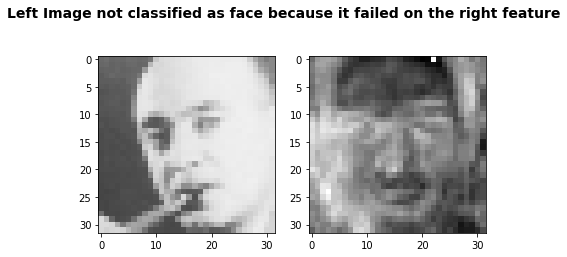

In [3]:
from eigenfaces import *
from time import time
from matplotlib import pyplot as plt


time_stamp_pre = time()

(train_data, random_train, test_data) = get_training_test_and_real_test_data()

print("took {} seconds to read data"
       .format(time() - time_stamp_pre))

classifier = Eigenclassifier(base_dim=20)

# Try Changing some of these values and see what changes! :) 
# classifier = Eigenclassifier(base_dim=20, allowed_feature_failures=0, orthogonalize=True)

classifier.build_base(train_data)
classifier.define_face_space(train_data)

fig, (ax1, ax2) = plt.subplots(1, 2)
im = None
axis = None
first_error_found = False
failures = 0
for image in test_data:
    (is_part_of_class, axis_failure) = classifier.predict(image)
    
    if not is_part_of_class and not first_error_found:
        im = image
        axis = axis_failure
        first_error_found = True
    
    if not is_part_of_class:
        failures += 1

print("Ratio of images classified as faces ", 1 - failures / len(test_data))

if not im is None:
    ax1.imshow(vector_to_image(im, (32, 32)))
    failed_axis = classifier.eigen_base_hd[axis]
    displayable_image = vector_to_image(classifier.displayable_vector(failed_axis), (32, 32))
    ax2.imshow(displayable_image)
    
    fig.suptitle('Left Image not classified as face because it failed on the right feature', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("No face failed, all were classified as positives :(")
    
        
    
    